In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [2]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [3]:
!ls

LICENSE		main.py			    xgboost_model.json
backpack.ipynb	playground-series-s5e2.zip


In [4]:
!mkdir -p /teamspace/studios/this_studio/.config/kaggle
!mv kaggle.json /teamspace/studios/this_studio/.config/kaggle/
!chmod 600 /teamspace/studios/this_studio/.config/kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle competitions download -c playground-series-s5e2


playground-series-s5e2.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip playground-series-s5e2.zip -d ./kaggle


Archive:  playground-series-s5e2.zip
  inflating: ./kaggle/sample_submission.csv  
  inflating: ./kaggle/test.csv       
  inflating: ./kaggle/train.csv      
  inflating: ./kaggle/training_extra.csv  


In [7]:
train_df_1= pd.read_csv("kaggle/train.csv")
train_df_1.drop('id',axis=1,inplace = True)
train_df_2=pd.read_csv("kaggle/training_extra.csv")
train_df_2.drop('id',axis=1,inplace=True)
test_df= pd.read_csv("kaggle/test.csv")
test_id = test_df['id']
test_df.drop('id',axis=1,inplace = True)


In [8]:
train_df = pd.concat([train_df_1, train_df_2], axis=0, ignore_index=True)

In [9]:
train_df.shape

(3994318, 10)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 object 
 1   Material              object 
 2   Size                  object 
 3   Compartments          float64
 4   Laptop Compartment    object 
 5   Waterproof            object 
 6   Style                 object 
 7   Color                 object 
 8   Weight Capacity (kg)  float64
 9   Price                 float64
dtypes: float64(3), object(7)
memory usage: 304.7+ MB


In [11]:
train_df.isnull().sum()

Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64

In [12]:
for col in train_df.columns:
    if col == "Price": 
        continue
    if train_df[col].dtype == 'object':
        train_df[col].fillna("Unknown", inplace=True)
        test_df[col].fillna("Unknown", inplace=True)
    else:
        train_df[col].fillna(train_df[col].median(), inplace=True)
        if col in test_df.columns: 
            test_df[col].fillna(test_df[col].median(), inplace=True)

In [13]:
train_df.isnull().sum()

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categories = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color','Weight Capacity (kg)']

for col in categories:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.fit_transform(test_df[col])

In [15]:
train_df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,1,1,1,7.0,2,0,2,0,422864,112.15875
1,1,0,2,10.0,2,2,1,3,1695046,68.88056
2,4,1,2,2.0,2,0,1,5,837448,39.17320
3,2,2,2,8.0,2,0,1,3,548130,80.60793
4,0,0,1,1.0,2,2,1,3,926275,86.02312


In [16]:
test_df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,3,1,2,2.0,0,0,2,3,78098
1,2,0,1,7.0,0,2,0,3,39779
2,0,0,0,9.0,0,2,1,1,29525
3,0,2,0,1.0,2,0,1,3,66395
4,5,2,0,2.0,2,2,2,0,20223


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 int64  
 1   Material              int64  
 2   Size                  int64  
 3   Compartments          float64
 4   Laptop Compartment    int64  
 5   Waterproof            int64  
 6   Style                 int64  
 7   Color                 int64  
 8   Weight Capacity (kg)  int64  
 9   Price                 float64
dtypes: float64(2), int64(8)
memory usage: 304.7 MB


In [18]:
x = train_df.drop('Price', axis=1)
y = train_df['Price']

In [19]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
!pip install seaborn

In [22]:

# Import additional required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,  
    min_samples_split=5,
    min_samples_leaf=5
)

In [23]:
# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
train_pred = model.predict(x_train)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
train_mae = mean_absolute_error(y_train, train_pred)
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()



Model Performance Metrics:
Training MAE: 33.61
Validation MAE: 33.64
Cross-validation MAE: 33.65
Training R² Score: 0.0036
Testing R² Score: 0.0012


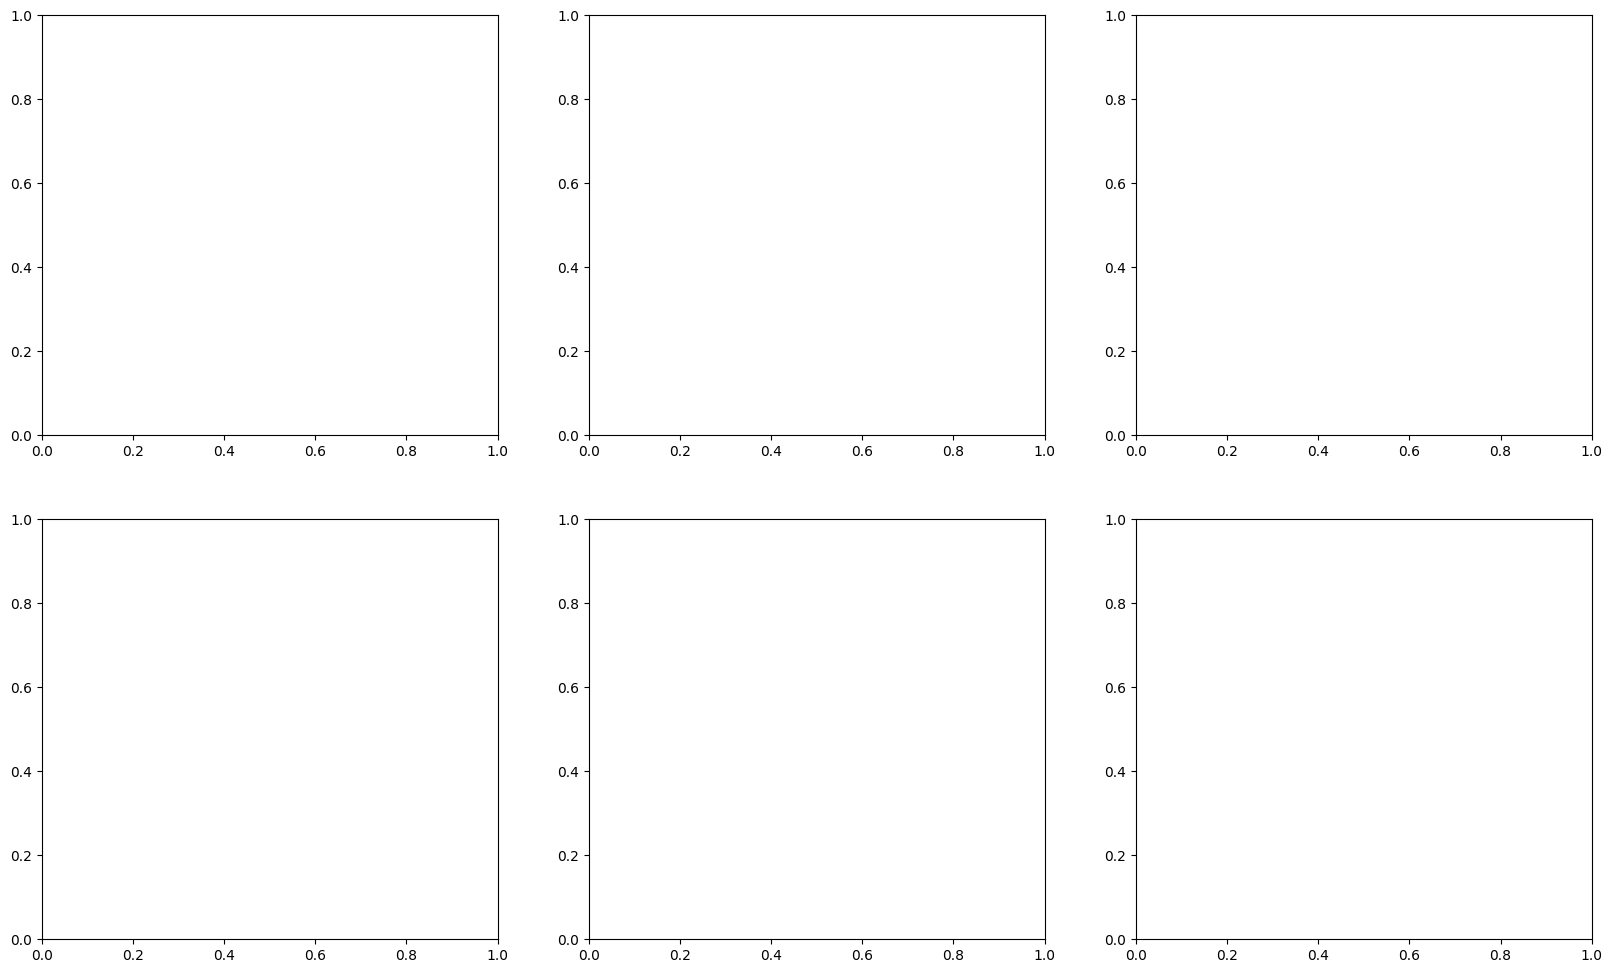

In [28]:

print("\nModel Performance Metrics:")
print(f"Training MAE: {train_mae:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Cross-validation MAE: {cv_mae:.2f}")
print(f"Training R² Score: {r2_train:.4f}")
print(f"Testing R² Score: {r2_test:.4f}")

# Create visualizations
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

In [29]:

# 1. Feature Correlation Matrix
if isinstance(x_train, pd.DataFrame):
    feature_names = x_train.columns
else:
    feature_names = [f'Feature_{i}' for i in range(x_train.shape[1])]
    
corr_matrix = pd.DataFrame(x_train, columns=feature_names).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0,0])
axes[0,0].set_title('Feature Correlation Matrix')

Text(0.5, 1.0, 'Feature Correlation Matrix')

In [30]:
# 2. Actual vs Predicted (Training)
axes[0,1].scatter(y_train, train_pred, alpha=0.5)
axes[0,1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Actual Values')
axes[0,1].set_ylabel('Predicted Values')
axes[0,1].set_title('Actual vs Predicted (Training)')


Text(0.5, 1.0, 'Actual vs Predicted (Training)')

In [31]:

# 3. Actual vs Predicted (Testing)
axes[0,2].scatter(y_test, y_pred, alpha=0.5)
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,2].set_xlabel('Actual Values')
axes[0,2].set_ylabel('Predicted Values')
axes[0,2].set_title('Actual vs Predicted (Testing)')


Text(0.5, 1.0, 'Actual vs Predicted (Testing)')

In [32]:

# 4. Residual Plot (Training)
residuals_train = y_train - train_pred
axes[1,0].scatter(train_pred, residuals_train, alpha=0.5)
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Predicted Values')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Residual Plot (Training)')

Text(0.5, 1.0, 'Residual Plot (Training)')

In [33]:

# 5. Residual Plot (Testing)
residuals_test = y_test - y_pred
axes[1,1].scatter(y_pred, residuals_test, alpha=0.5)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted Values')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Residual Plot (Testing)')



Text(0.5, 1.0, 'Residual Plot (Testing)')

In [34]:
# 6. Feature Importance
importance = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=True)
sns.barplot(data=importance, y='feature', x='importance', ax=axes[1,2])
axes[1,2].set_title('Feature Importance')

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

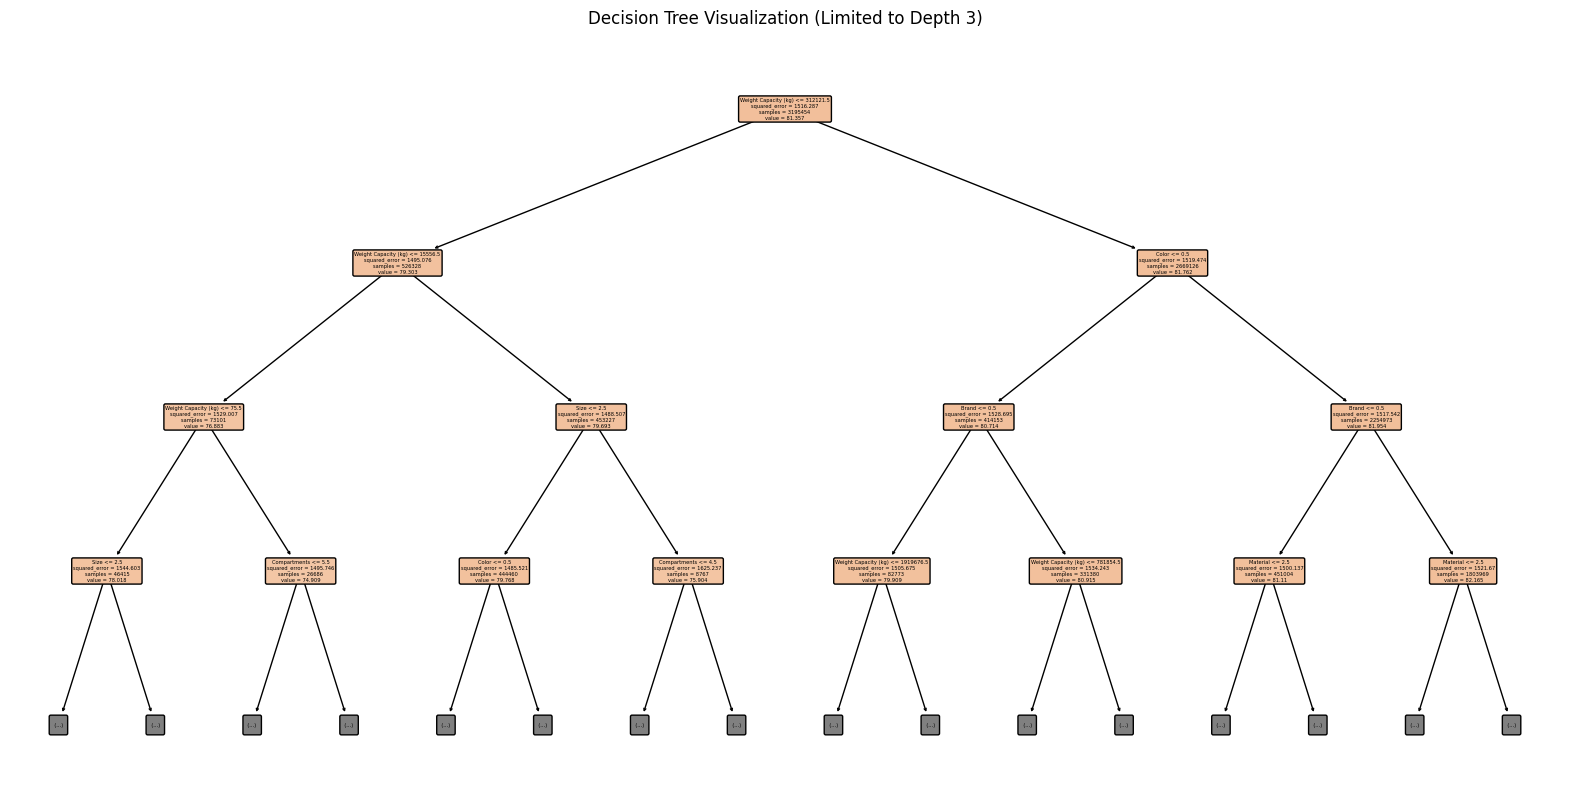

In [35]:
# Visualize decision tree structure
plt.figure(figsize=(20,10))
plot_tree(model, 
         feature_names=feature_names,
         filled=True,
         rounded=True,
         max_depth=3)  # Limiting depth for visualization
plt.title("Decision Tree Visualization (Limited to Depth 3)")
plt.show()


In [36]:
# Make predictions on the test set
test_predictions = model.predict(test_df)

In [37]:
# Create submission file
submission = pd.DataFrame({'id': test_id, 'Price': test_predictions})
submission.to_csv('submission.csv', index=False)
print("\nSubmission file saved as 'submission.csv'.")


Submission file saved as 'submission.csv'.


In [38]:
# Add these imports at the top if not already present
import joblib
import os
from datetime import datetime
import json

# Create a directory to store the model and results
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_dir = f'model_results_{timestamp}'
os.makedirs(model_dir, exist_ok=True)

# 1. Save the model
model_path = os.path.join(model_dir, 'decision_tree_model.joblib')
joblib.dump(model, model_path)

# 2. Save model parameters and metrics
metrics = {
    'model_parameters': model.get_params(),
    'performance_metrics': {
        'training_mae': float(train_mae),
        'validation_mae': float(mae),
        'cross_validation_mae': float(cv_mae),
        'training_r2': float(r2_train),
        'testing_r2': float(r2_test)
    },
    'feature_importance': {
        name: float(importance) 
        for name, importance in zip(feature_names, model.feature_importances_)
    }
}

# Save metrics to JSON
metrics_path = os.path.join(model_dir, 'model_metrics.json')
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=4)

# 3. Save all plots
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig(os.path.join(model_dir, 'correlation_matrix.png'))
plt.close()

# Actual vs Predicted and Residuals
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Training data plots
axes[0,0].scatter(y_train, train_pred, alpha=0.5)
axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Values')
axes[0,0].set_ylabel('Predicted Values')
axes[0,0].set_title('Actual vs Predicted (Training)')

# Test data plots
axes[0,1].scatter(y_test, y_pred, alpha=0.5)
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Actual Values')
axes[0,1].set_ylabel('Predicted Values')
axes[0,1].set_title('Actual vs Predicted (Testing)')

# Residual plots
axes[1,0].scatter(train_pred, residuals_train, alpha=0.5)
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Predicted Values')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Residual Plot (Training)')

axes[1,1].scatter(y_pred, residuals_test, alpha=0.5)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted Values')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Residual Plot (Testing)')

plt.tight_layout()
plt.savefig(os.path.join(model_dir, 'model_performance_plots.png'))
plt.close()

# Feature Importance plot
plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=True)
sns.barplot(data=importance_df, y='feature', x='importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig(os.path.join(model_dir, 'feature_importance.png'))
plt.close()

# Save the submission file in the same directory
submission.to_csv(os.path.join(model_dir, 'submission.csv'), index=False)

print(f"\nModel and results saved in directory: {model_dir}")
print("\nSaved files:")
print(f"1. Model: {model_path}")
print(f"2. Metrics: {metrics_path}")
print("3. Visualizations:")
print("   - correlation_matrix.png")
print("   - model_performance_plots.png")
print("   - feature_importance.png")
print("4. Submission file: submission.csv")

# Function to load the saved model and metrics (for future use)
def load_saved_model(model_dir):
    """
    Load the saved model and its metrics
    """
    model = joblib.load(os.path.join(model_dir, 'decision_tree_model.joblib'))
    with open(os.path.join(model_dir, 'model_metrics.json'), 'r') as f:
        metrics = json.load(f)
    return model, metrics

# Example of loading (commented out)
"""
# Load the model and metrics
loaded_model, loaded_metrics = load_saved_model(model_dir)

# Make new predictions
new_predictions = loaded_model.predict(new_data)
"""


Model and results saved in directory: model_results_20250217_180243

Saved files:
1. Model: model_results_20250217_180243/decision_tree_model.joblib
2. Metrics: model_results_20250217_180243/model_metrics.json
3. Visualizations:
   - correlation_matrix.png
   - model_performance_plots.png
   - feature_importance.png
4. Submission file: submission.csv


'\n# Load the model and metrics\nloaded_model, loaded_metrics = load_saved_model(model_dir)\n\n# Make new predictions\nnew_predictions = loaded_model.predict(new_data)\n'